In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [67]:
%load_ext lab_black
pd.set_option("max_columns", None)

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [68]:
# csv files
csv_files = [
    "Cities.csv",
    "Conferences.csv",
    "MConferenceTourneyGames.csv",
    "MGameCities.csv",
    "MMasseyOrdinals.csv",
    "MNCAATourneyCompactResults.csv",
    "MNCAATourneyDetailedResults.csv",
    "MNCAATourneySeedRoundSlots.csv",
    "MNCAATourneySeeds.csv",
    "MNCAATourneySlots.csv",
    "MRegularSeasonCompactResults.csv",
    "MRegularSeasonDetailedResults.csv",
    "MSampleSubmissionStage1.csv",
    "MSeasons.csv",
    "MSecondaryTourneyCompactResults.csv",
    "MSecondaryTourneyTeams.csv",
    "MTeamCoaches.csv",
    "MTeamConferences.csv",
    "MTeamSpellings.csv",
    "MTeams.csv",
]

# getting the csv files to dataframes
dataframes = list()
for file in csv_files:
    path = "../data/raw/" + file
    df = pd.read_csv(path, encoding="cp1252")
    dataframes.append(df)

# convert to dataframe name
csv_names = " ".join(list(map(lambda x: "df_" + x.split(".")[0], csv_files)))
csv_names

# names are corrected manually
(
    df_Cities,
    df_Conf,
    df_ConfTournGms,
    df_GameCities,
    df_MasseyOrdinals,
    df_NCAATourCR,
    df_NCAATourDR,
    df_NCAATourSeedRoundSlots,
    df_NCAATourSeeds,
    df_NCAATourSlots,
    df_RegSCR,
    df_RegSDR,
    df_SampleSubmissionStage1,
    df_Seasons,
    df_SecTourCR,
    df_SecTourTeams,
    df_TeamCoaches,
    df_TeamConf,
    df_TeamSpellings,
    df_Teams,
) = dataframes

### Selection Sunday is 13 March. 68 teams will be announced than.

### Exploring 2021 Regular Season 

In [69]:
# all division 1 teams for 2021
teams_2021 = df_Teams[
    (df_Teams.LastD1Season >= 2021) & (df_Teams.FirstD1Season <= 2021)
].TeamID.unique()

In [70]:
# seeded teams for 2021
seed_2021 = df_NCAATourSeeds[df_NCAATourSeeds.Season == 2021].TeamID.unique()

In [71]:
# Regular season matches 2021
df_reg_2021 = df_RegSDR[df_RegSDR.Season == 2021].copy()

In [72]:
# number of games played
gp = list(
    map(
        lambda x: df_reg_2021[
            (df_reg_2021.WTeamID == x) | (df_reg_2021.LTeamID == x)
        ].shape[0],
        teams_2021,
    )
)

In [73]:
# number of wins
w = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].shape[0],
        teams_2021,
    )
)

# number of losses
l = np.subtract(gp, w)

In [74]:
# psw = points scored in wins
psw = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].WScore.sum(),
        teams_2021,
    )
)

# psl = points scored in losses
psl = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.LTeamID == x)].LScore.sum(),
        teams_2021,
    )
)

# paw = points allowed in wins
paw = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].LScore.sum(),
        teams_2021,
    )
)

# pal = points allowed in losses
pal = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.LTeamID == x)].WScore.sum(),
        teams_2021,
    )
)

In [75]:
# fgm = field goal made
fgm = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].WFGM.sum()
        + df_reg_2021[(df_reg_2021.LTeamID == x)].LFGM.sum(),
        teams_2021,
    )
)

# fga = field goad attempts
fga = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].WFGA.sum()
        + df_reg_2021[(df_reg_2021.LTeamID == x)].LFGA.sum(),
        teams_2021,
    )
)

# fgm3 = 3 points fg made
fgm3 = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].WFGM3.sum()
        + df_reg_2021[(df_reg_2021.LTeamID == x)].LFGM3.sum(),
        teams_2021,
    )
)

# fga3 = 3 points attempts
fga3 = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].WFGA3.sum()
        + df_reg_2021[(df_reg_2021.LTeamID == x)].LFGA3.sum(),
        teams_2021,
    )
)

# ftm = free throws made
ftm = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].WFTM.sum()
        + df_reg_2021[(df_reg_2021.LTeamID == x)].LFTM.sum(),
        teams_2021,
    )
)

# fta = free throw attempts
fta = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].WFTA.sum()
        + df_reg_2021[(df_reg_2021.LTeamID == x)].LFTA.sum(),
        teams_2021,
    )
)

# orb = offensive rebound
orb = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].WOR.sum()
        + df_reg_2021[(df_reg_2021.LTeamID == x)].LOR.sum(),
        teams_2021,
    )
)

# drb = defensive rebound
drb = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].WDR.sum()
        + df_reg_2021[(df_reg_2021.LTeamID == x)].LDR.sum(),
        teams_2021,
    )
)

# ast = assists
ast = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].WAst.sum()
        + df_reg_2021[(df_reg_2021.LTeamID == x)].LAst.sum(),
        teams_2021,
    )
)

# to = turnover
to = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].WTO.sum()
        + df_reg_2021[(df_reg_2021.LTeamID == x)].LTO.sum(),
        teams_2021,
    )
)

# stl = steal
stl = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].WStl.sum()
        + df_reg_2021[(df_reg_2021.LTeamID == x)].LStl.sum(),
        teams_2021,
    )
)

# blk = block
blk = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].WBlk.sum()
        + df_reg_2021[(df_reg_2021.LTeamID == x)].LBlk.sum(),
        teams_2021,
    )
)

# pf = personal fouls
pf = list(
    map(
        lambda x: df_reg_2021[(df_reg_2021.WTeamID == x)].WPF.sum()
        + df_reg_2021[(df_reg_2021.LTeamID == x)].LPF.sum(),
        teams_2021,
    )
)

In [76]:
# home win percentage
def hpw_calc(TeamID):
    try:
        return (
            df_reg_2021[
                (df_reg_2021.WTeamID == TeamID) & (df_reg_2021.WLoc == "H")
            ].shape[0]
            / df_reg_2021[
                ((df_reg_2021.WTeamID == TeamID) | (df_reg_2021.LTeamID == TeamID))
                & (df_reg_2021.WLoc == "H")
            ].shape[0]
            * 100
        )
    except:
        return 0


hwp = list(map(hpw_calc, teams_2021))

In [77]:
# post-season tournements , pre NCAA tournement
# these games are the most recent before the tournement and they are played with tournement caliber teams

# creating dataframe for post season conference 2021
df_pst2021 = df_ConfTournGms[df_ConfTournGms.Season == 2021].copy()
df_pst2021

# post season tournement wins
ps_w = list(
    map(
        lambda x: df_pst2021[(df_pst2021.WTeamID == x)].shape[0],
        teams_2021,
    )
)

# post season tournement losses
ps_l = list(
    map(
        lambda x: df_pst2021[(df_pst2021.LTeamID == x)].shape[0],
        teams_2021,
    )
)

# post season tournement winning percentage
def ps_winning_percentage(TeamID):
    try:
        return (
            100
            * df_pst2021[(df_pst2021.WTeamID == TeamID)].shape[0]
            / (
                df_pst2021[(df_pst2021.WTeamID == TeamID)].shape[0]
                + df_pst2021[(df_pst2021.LTeamID == TeamID)].shape[0]
            )
        )
    except:
        return 1


# post season rating
# the minimum difference between wins and losses is -1. To make the -1 teams as good as teams that have not played +1
ps_rtg = np.subtract(ps_w, ps_l) + 1

# post season winning percentages
ps_wp = list(map(ps_winning_percentage, teams_2021))

In [78]:
# Regular Season Standings Table
df_lt = pd.DataFrame(
    data=list(
        zip(
            teams_2021,
            gp,
            w,
            l,
            psw,
            psl,
            paw,
            pal,
            fgm,
            fga,
            fgm3,
            fga3,
            ftm,
            fta,
            orb,
            drb,
            ast,
            to,
            stl,
            blk,
            pf,
            hwp,
            ps_w,
            ps_wp,
            ps_rtg,
        )
    ),
    columns=[
        "TeamID",
        "gp",
        "w",
        "l",
        "psw",
        "psl",
        "paw",
        "pal",
        "fgm",
        "fga",
        "fgm3",
        "fga3",
        "ftm",
        "fta",
        "orb",
        "drb",
        "ast",
        "to",
        "stl",
        "blk",
        "pf",
        "hwp",
        "ps_w",
        "ps_wp",
        "ps_rtg",
    ],
)
df_lt["ps"] = (df_lt.psw + df_lt.psl) / df_lt.gp
df_lt["pa"] = (df_lt.paw + df_lt.pal) / df_lt.gp
df_lt["psw"] = df_lt.psw / df_lt.w
df_lt["psl"] = df_lt.psl / df_lt.l
df_lt["paw"] = df_lt.paw / df_lt.w
df_lt["pal"] = df_lt.pal / df_lt.l
df_lt["fgm"] = df_lt.fgm / df_lt.gp
df_lt["fga"] = df_lt.fga / df_lt.gp
df_lt["fgm3"] = df_lt.fgm3 / df_lt.gp
df_lt["fga3"] = df_lt.fga3 / df_lt.gp
df_lt["ftm"] = df_lt.ftm / df_lt.gp
df_lt["fta"] = df_lt.fta / df_lt.gp
df_lt["orb"] = df_lt.orb / df_lt.gp
df_lt["drb"] = df_lt.drb / df_lt.gp
df_lt["ast"] = df_lt.ast / df_lt.gp
df_lt["to"] = df_lt.to / df_lt.gp
df_lt["stl"] = df_lt.stl / df_lt.gp
df_lt["blk"] = df_lt.blk / df_lt.gp
df_lt["pf"] = df_lt.pf / df_lt.gp
df_lt["wp"] = (df_lt.w / df_lt.gp) * 100
df_lt["fgp"] = (df_lt.fgm / df_lt.fga) * 100
df_lt["fgp3"] = (df_lt.fgm3 / df_lt.fga3) * 100
df_lt["ft%"] = (df_lt.ftm / df_lt.fta) * 100
df_lt["mrg"] = df_lt.ps - df_lt.pa
df_lt["def"] = df_lt.drb + df_lt.stl + df_lt.blk
df_lt["off"] = df_lt.orb - df_lt.to

In [79]:
# opponent winning percentages
def opponent_wp_calc(TeamID):
    try:
        opponents = df_reg_2021[(df_reg_2021.WTeamID == TeamID)].LTeamID.values
        opponents = np.append(
            opponents, df_reg_2021[(df_reg_2021.LTeamID == TeamID)].WTeamID.values
        )
        opponents_wp = [df_lt[df_lt.TeamID == x].wp for x in opponents]
        return np.mean(opponents_wp)
    except:
        return 0


opp_wp = list(map(opponent_wp_calc, teams_2021))
df_lt["opp_wp"] = opp_wp

/Users/ozgunhaznedar/opt/anaconda3/envs/STATS/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ozgunhaznedar/opt/anaconda3/envs/STATS/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [80]:
# rating : 100-opp_wp is what is the expected wins for an average team against those opponents.
# subtracting it from the teams winning percentage gives the teams margin over an average team
df_lt["s_rating"] = df_lt.wp - (100 - df_lt.opp_wp)

In [81]:
df_lt.sort_values("wp", ascending=False)[
    [
        "TeamID",
        "s_rating",
        "w",
        "l",
        "wp",
        "hwp",
        "mrg",
        "fgp",
        "ps_w",
        "ps_wp",
        "ps_rtg",
        "ps",
        "pa",
        "psw",
        "psl",
        "opp_wp",
    ]
].head(20)

,TeamID,s_rating,w,l,wp,hwp,mrg,fgp,ps_w,ps_wp,ps_rtg,ps,pa,psw,psl,opp_wp
104,1211,50.885543,26,0,100.000000,100.000000,23.000000,55.086849,2,100.000000,3,92.115385,69.115385,92.115385,NaN,50.885543
342,1457,37.856284,23,1,95.833333,100.000000,12.750000,46.069720,3,100.000000,4,79.541667,66.791667,80.608696,55.000000,42.022951
52,1159,34.427015,14,1,93.333333,100.000000,17.733333,49.947090,3,100.000000,4,86.333333,68.600000,87.285714,73.000000,41.093682
20,1124,41.096950,22,2,91.666667,91.666667,17.958333,49.306015,1,50.000000,1,84.375000,66.416667,86.045455,66.000000,49.430283
114,1222,38.955073,23,3,88.461538,82.352941,18.000000,43.833017,3,100.000000,4,76.307692,58.307692,77.565217,66.666667,50.493534
21,1125,28.704266,25,4,86.206897,84.615385,12.172414,48.873874,2,66.666667,2,81.586207,69.413793,82.520000,75.750000,42.497370
72,1179,29.932467,23,4,85.185185,85.714286,11.185185,48.797039,1,50.000000,1,76.222222,65.037037,79.173913,59.250000,44.747282
250,1361,38.505152,22,4,84.615385,85.714286,12.423077,45.349627,3,100.000000,4,73.730769,61.307692,76.545455,58.250000,53.889768
152,1260,32.787528,22,4,84.615385,78.571429,14.692308,49.742078,3,100.000000,4,70.538462,55.846154,71.681818,64.250000,48.172143
189,1298,24.298433,15,3,83.333333,88.888889,4.500000,44.764649,0,0.000000,0,71.500000,67.000000,72.600000,66.000000,40.965099


## Comparing with Tournement Results

In [82]:
# run the tournement notebook
%run ./OH_tournement-embed.ipynb

In [83]:
# The performance of the teams in the tournement by rating
df_rating.head()

,TeamID,rating
0,1124,59.166667
1,1211,54.166667
2,1222,38.333333
3,1276,37.500000
4,1425,33.333333


In [84]:
# regular season result of seeded teams and their rating in the tournement
df_seeded = pd.merge(df_rating, df_lt[df_lt.TeamID.isin(seeds_2021)])
df_seeded.head()

,TeamID,rating,gp,w,l,psw,psl,paw,pal,fgm,...,pa,wp,fgp,fgp3,ft%,mrg,def,off,opp_wp,s_rating
0,1124,59.166667,24,22,2,86.045455,66.000000,65.454545,77.000000,31.083333,...,66.416667,91.666667,49.306015,41.821248,69.682152,17.958333,35.083333,-0.833333,49.430283,41.096950
1,1211,54.166667,26,26,0,92.115385,NaN,69.115385,NaN,34.153846,...,69.115385,100.000000,55.086849,36.468330,72.588832,23.000000,38.423077,-3.692308,50.885543,50.885543
2,1222,38.333333,26,23,3,77.565217,66.666667,56.565217,71.666667,26.653846,...,58.307692,88.461538,43.833017,35.479042,74.279835,18.000000,37.269231,2.692308,50.493534,38.955073
3,1276,37.500000,24,20,4,79.450000,60.250000,64.000000,72.250000,27.875000,...,65.375000,83.333333,48.373102,38.675214,77.750000,10.875000,35.791667,-2.583333,54.412100,37.745433
4,1425,33.333333,29,22,7,78.500000,63.000000,63.318182,70.714286,27.172414,...,65.103448,75.862069,46.710136,34.790875,64.715190,9.655172,35.862069,-1.620690,55.163698,31.025766


In [85]:
df_seeded.columns

Index(['TeamID', 'rating', 'gp', 'w', 'l', 'psw', 'psl', 'paw', 'pal', 'fgm',
       'fga', 'fgm3', 'fga3', 'ftm', 'fta', 'orb', 'drb', 'ast', 'to', 'stl',
       'blk', 'pf', 'hwp', 'ps_w', 'ps_wp', 'ps_rtg', 'ps', 'pa', 'wp', 'fgp',
       'fgp3', 'ft%', 'mrg', 'def', 'off', 'opp_wp', 's_rating'],
      dtype='object')

In [86]:
#  The variables that are thought to be explanatory are selected
exog = [
    "ps",
    "pa",
    "fga",
    "fga3",
    "fta",
    "ast",
    "pf",
    "hwp",
    "ps_rtg",
    "wp",
    "fgp",
    "fgp3",
    "mrg",
    "opp_wp",
    "s_rating",
    "ft%",
    "def",
    "off",
]

<AxesSubplot:>

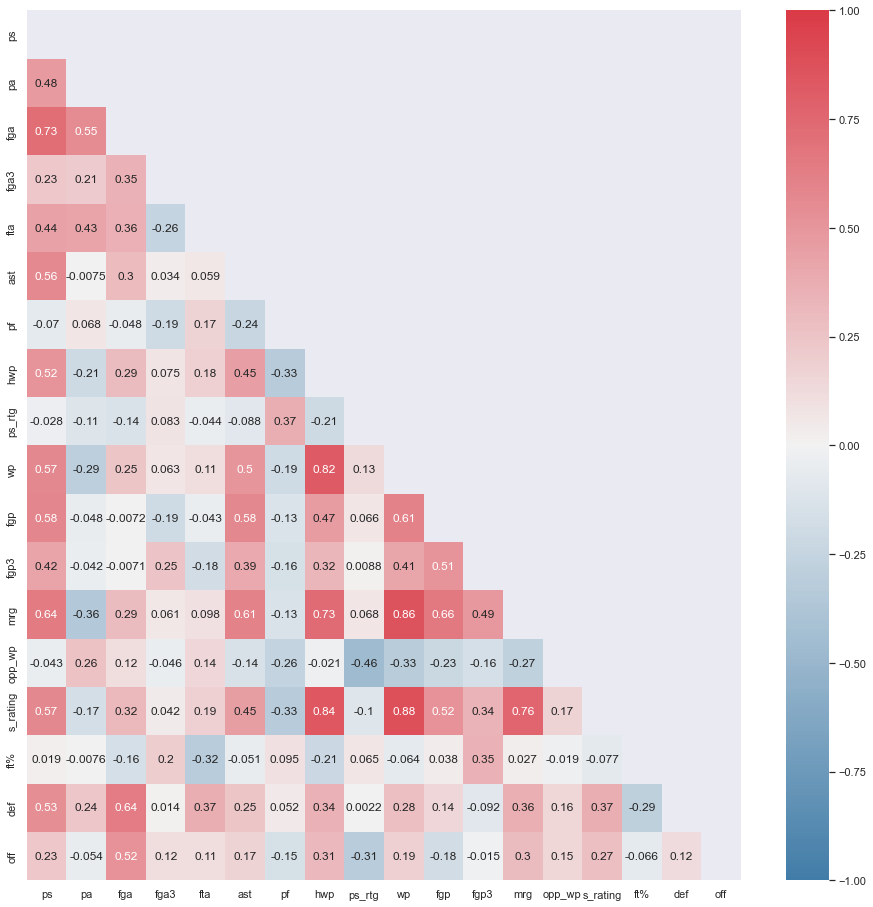

In [87]:
# correleations
sns.set(rc={"figure.figsize": (16, 16)})
corr = df_seeded[exog].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(240, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap=cmap, annot=True)

In [88]:
# wp, hwp and s_rating are very highly correlated. wp is dropped.
exog.remove("wp")

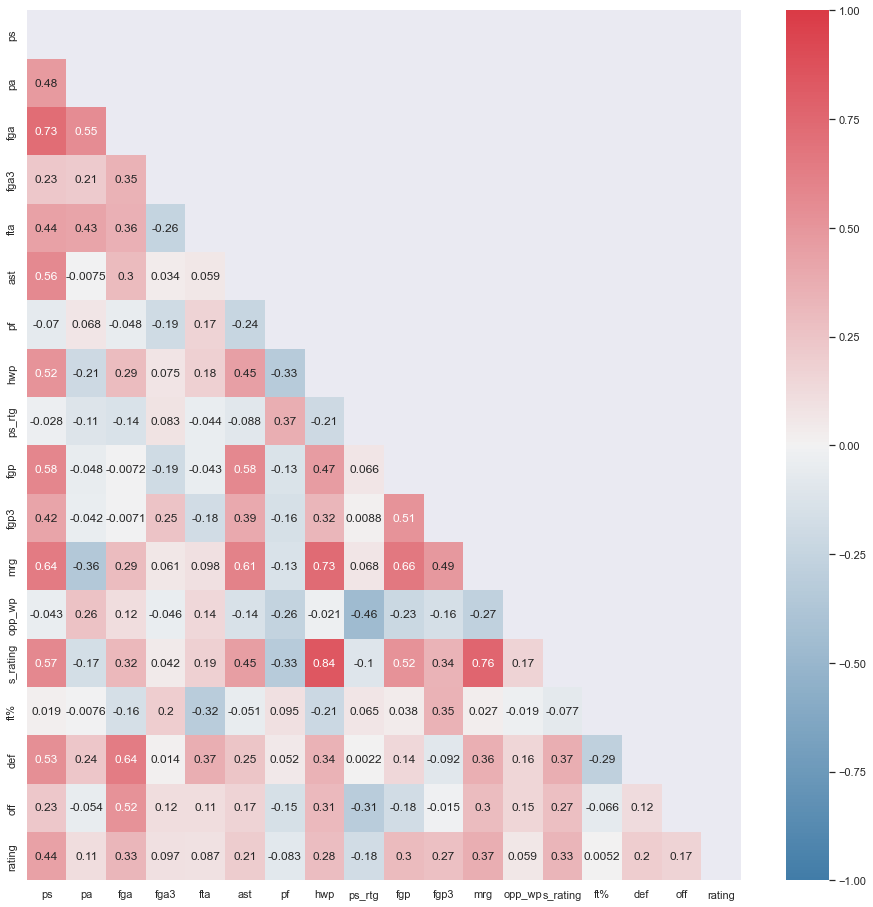

In [89]:
# correleations with the tournement rating 
exog.append("rating")
sns.set(rc={"figure.figsize": (16, 16)})
corr = df_seeded[exog].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(240, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap=cmap, annot=True)
exog.remove("rating")

## Model Building

In [25]:
# checking for null values
df_seeded[exog].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 66
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ps        67 non-null     float64
 1   pa        67 non-null     float64
 2   fga       67 non-null     float64
 3   fga3      67 non-null     float64
 4   fta       67 non-null     float64
 5   ast       67 non-null     float64
 6   pf        67 non-null     float64
 7   hwp       67 non-null     float64
 8   ps_rtg    67 non-null     int64  
 9   fgp       67 non-null     float64
 10  fgp3      67 non-null     float64
 11  mrg       67 non-null     float64
 12  opp_wp    67 non-null     float64
 13  s_rating  67 non-null     float64
 14  ft%       67 non-null     float64
 15  def       67 non-null     float64
 16  off       67 non-null     float64
dtypes: float64(16), int64(1)
memory usage: 9.4 KB


In [26]:
X = df_seeded[exog]
y = df_seeded.rating
X_const = sm.add_constant(X)
mod = sm.OLS(y, X_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     1.470
Date:                Fri, 25 Feb 2022   Prob (F-statistic):              0.149
Time:                        02:36:52   Log-Likelihood:                -307.17
No. Observations:                  67   AIC:                             648.3
Df Residuals:                      50   BIC:                             685.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1237.7168   1259.060      0.983      0.3

In [27]:
# get predicted ratings from the model
rating_pred = res.predict(X_const)

<AxesSubplot:ylabel='rating'>

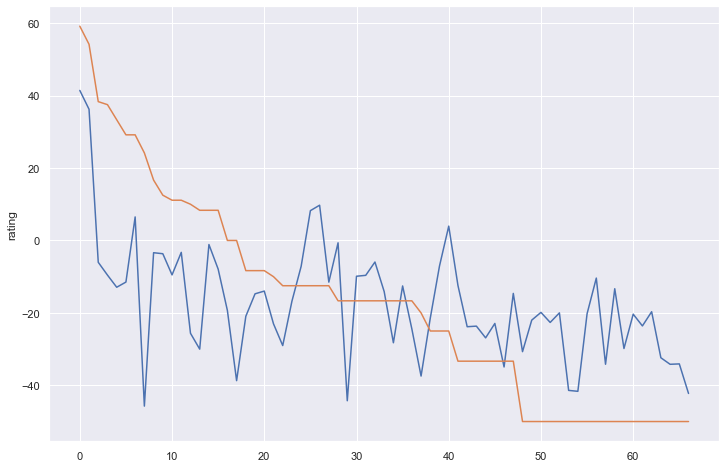

In [28]:
# Comparing the predicted rating vs the real rating
fig, ax = plt.subplots(figsize=(12, 8))
x_axis = np.arange(len(rating_pred))
sns.lineplot(x=x_axis, y=rating_pred, ax=ax)
sns.lineplot(x=x_axis, y=df_seeded.rating, ax=ax)

In [29]:
from itertools import combinations

In [30]:
# find all the combination starting from 65 elements
permutations = list()
for i in range(1, len(exog)):
    permutation = list(combinations(exog, i))
    permutations += permutation
len(permutations)

131070

In [31]:
# running OLS on all combinations of variables
aic_array = np.zeros(len(permutations))
for i, sample in enumerate(permutations):
    X = df_seeded[list(sample)]
    X_const = sm.add_constant(X)
    y = df_seeded.rating
    mod = sm.OLS(y, X_const)
    res = mod.fit()
    aic_array[i] = res.aic

In [32]:
# finding the index number where aic is minimum
minimum = aic_array.min()
idx = np.where(aic_array == minimum)[0][0]
idx

24

In [33]:
# The set of variables that give the minimum aic
permutations[idx]

('ps', 'ps_rtg')

In [34]:
# running the regression with the lowest aic variables
X = df_seeded[list(permutations[idx])]
X_const = sm.add_constant(X)
y = df_seeded.rating
mod = sm.OLS(y, X_const)
res = mod.fit()

In [35]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     9.208
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           0.000306
Time:                        02:40:40   Log-Likelihood:                -311.61
No. Observations:                  67   AIC:                             629.2
Df Residuals:                      64   BIC:                             635.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -194.7093     47.217     -4.124      0.0

In [36]:
# get predicted ratings from the model
rating_pred = res.predict(X_const)

<AxesSubplot:ylabel='rating'>

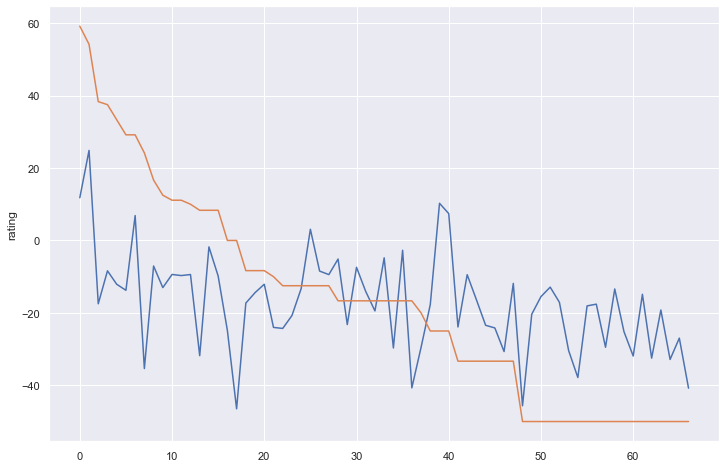

In [37]:
# Comparing the predicted rating vs the real rating
fig, ax = plt.subplots(figsize=(12, 8))
x_axis = np.arange(len(rating_pred))
sns.lineplot(x=x_axis, y=rating_pred, ax=ax)
sns.lineplot(x=x_axis, y=df_seeded.rating, ax=ax)

### The variation in rating is low especially in the worst performing teams. This is because, it is very difficult to distinguish worst team in the tournement by their rating.
### Adding season ratings to tournement rating to increase variation. 

In [90]:
# creating new rating variable for tournement : rating modified
df_seeded["rating_m"] = df_seeded["rating"] + df_seeded["s_rating"]

In [105]:
exog

['ps',
 'pa',
 'fga',
 'fga3',
 'fta',
 'ast',
 'pf',
 'hwp',
 'ps_rtg',
 'fgp',
 'fgp3',
 'mrg',
 'opp_wp',
 's_rating',
 'ft%',
 'def',
 'off']

<AxesSubplot:ylabel='rating'>

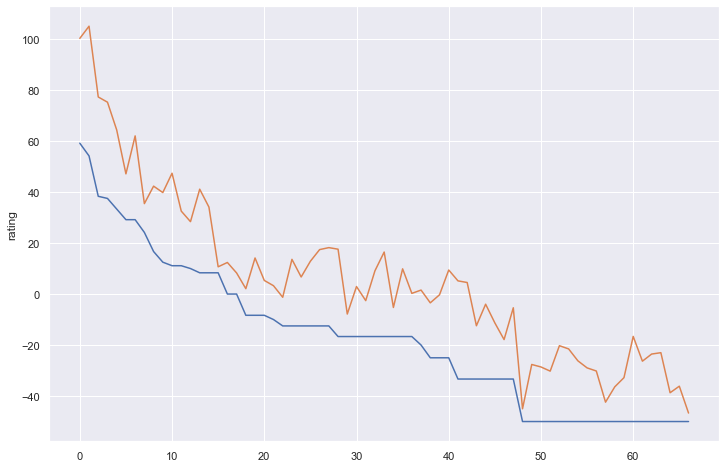

In [106]:
# Comparing the modified rating with rating ; there is more variation in modified
fig, ax = plt.subplots(figsize=(12, 8))
x_axis = np.arange(len(rating_pred))
sns.lineplot(x=x_axis, y=df_seeded.rating, ax=ax)
sns.lineplot(x=x_axis, y=df_seeded.rating_m, ax=ax)

In [107]:
exog

['ps',
 'pa',
 'fga',
 'fga3',
 'fta',
 'ast',
 'pf',
 'hwp',
 'ps_rtg',
 'fgp',
 'fgp3',
 'mrg',
 'opp_wp',
 's_rating',
 'ft%',
 'def',
 'off']

In [108]:
# regresiion with all variables ; increase in R2
X = df_seeded[exog]
y = df_seeded.rating_m
X_const = sm.add_constant(X)
mod = sm.OLS(y, X_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               rating_m   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     3.075
Date:                Fri, 25 Feb 2022   Prob (F-statistic):            0.00122
Time:                        10:29:48   Log-Likelihood:                -307.17
No. Observations:                  67   AIC:                             648.3
Df Residuals:                      50   BIC:                             685.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1237.7168   1259.060      0.983      0.3

In [109]:
# regression with all combinations
permutations = list()
for i in range(1, len(exog)):
    permutation = list(combinations(exog, i))
    permutations += permutation
len(permutations)

# running OLS on all combinations of variables
aic_array = np.zeros(len(permutations))
for i, sample in enumerate(permutations):
    X = df_seeded[list(sample)]
    X_const = sm.add_constant(X)
    y = df_seeded.rating_m
    mod = sm.OLS(y, X_const)
    res = mod.fit()
    aic_array[i] = res.aic


# finding the index number where aic is minimum
minimum = aic_array.min()
idx = np.where(aic_array == minimum)[0][0]
idx

# The set of variables that give the minimum aic
permutations[idx]

# running the regression with the lowest aic variables
X = df_seeded[list(permutations[idx])]
X_const = sm.add_constant(X)
y = df_seeded.rating
mod = sm.OLS(y, X_const)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     6.279
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           0.000851
Time:                        10:37:15   Log-Likelihood:                -311.32
No. Observations:                  67   AIC:                             630.6
Df Residuals:                      63   BIC:                             639.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -177.3722     52.835     -3.357      0.0

<AxesSubplot:ylabel='rating_m'>

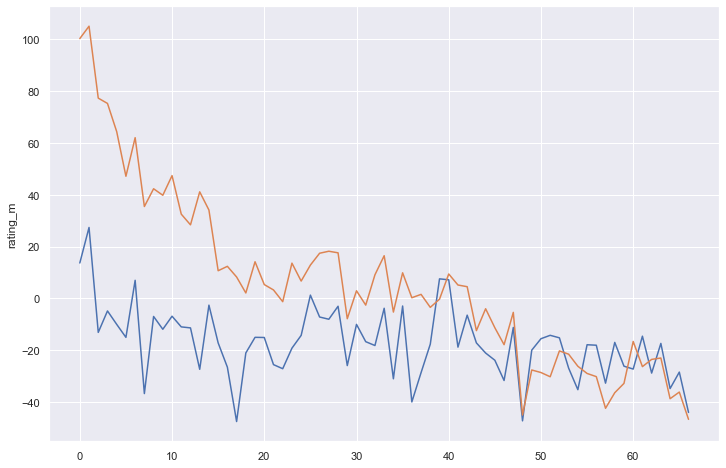

In [110]:
# get predicted ratings from the model
rating_pred = res.predict(X_const)

# Comparing the predicted rating vs the modified rating
fig, ax = plt.subplots(figsize=(12, 8))
x_axis = np.arange(len(rating_pred))
sns.lineplot(x=x_axis, y=rating_pred, ax=ax  )
sns.lineplot(x=x_axis, y=df_seeded.rating_m, ax=ax)